In [197]:
import cv2
import numpy as np
import json
from labelme import utils
from matplotlib import pyplot as plt

In [36]:
def generate_label_png(json_file_path):
    print('generate_label_png'+json_file_path)
    data = json.load(open(json_file_path))
    #imageData = data['imageData']
    #img = utils.img_b64_to_arr(imageData)
    label_name_to_value = {'_background_': 0}
    for shape in data['shapes']:
        label_name = shape['label']
        if label_name in label_name_to_value:
            label_value = label_name_to_value[label_name]
        else:
            label_value = len(label_name_to_value)
            label_name_to_value[label_name] = label_value
    label_values, label_names = [], []
    for ln, lv in sorted(label_name_to_value.items(), key=lambda x: x[1]):
        label_values.append(lv)
        label_names.append(ln)
    print(label_names)
    assert label_values == list(range(len(label_values)))
    label_only = utils.shapes_to_label((512,512), data['shapes'], label_name_to_value).astype('uint8')
    #有多種標籤的話會生成不同顏色
    #就像最大連通區域
    #屬於第一種標籤的部分 塗上就會標為1
    #屬於第二種標籤的部分 塗上就會標為2
    #背景就會標成 0 
    #但是我現在想把它變成同一張 所以大於等於1的部分都會標成1
    #label_only[label_only>=1]=1
    if label_only.shape != (512,512):
        print('no 512!')
        label_only = cv2.resize(label_only,(512,512))
    filename = data['imagePath']
    return label_only,filename,label_names

In [232]:
def label_to_mask(json_file_path):
    data = json.load(open(json_file_path))
    label_name_to_value = {'_background_': 0}
    for shape in data['shapes']:
        label_name = shape['label']
        if label_name in label_name_to_value:
            label_value = label_name_to_value[label_name]
        else:
            label_value = len(label_name_to_value)
            label_name_to_value[label_name] = label_value
    label_values, label_names = [], []
    for ln, lv in sorted(label_name_to_value.items(), key=lambda x: x[1]):
        label_values.append(lv)
        label_names.append(ln)
    assert label_values == list(range(len(label_values)))
    label_only = utils.shapes_to_label((512,512), data['shapes'], label_name_to_value)#.astype('uint8')#convert to unsigned integer
    label_only = list(label_only)
    for item in label_only:
        item = item.astype('uint8')
    # #有多種標籤的話會生成不同顏色
    # #就像最大連通區域
    # #屬於第一種標籤的部分 塗上就會標為1
    # #屬於第二種標籤的部分 塗上就會標為2
    # #背景就會標成 0 
    # #但是我現在想把它變成同一張 所以大於等於1的部分都會標成1
    for item in label_only:
        item[item>=1] = 1
        item = cv2.resize(item,(512,512))
    filename = data['imagePath']
    img = np.zeros([512,512])
    for i in range(0,512):
        for j in range(0,512):
#             if label_
    return filename , label_only

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


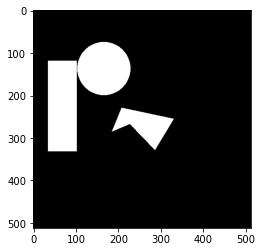

In [233]:
filename , label = label_to_mask("second.json")
img = np.zeros([512,512])
for item in label:
    print(item)
    for i in range(0,512):
        for j in range(0,512):
            if item[i,j] != 0:
                img[i,j] = 255
# # img[10:1:100] == 255
plt.imshow(img , 'gray')
# cv2.imwrite("test.jpg" , img)

In [174]:
jpg = cv2.imread("CT-7358-0001.jpg" , 0)
# img = cv2.imread(path+"94/lung_mask/JPG/lung_mask_7370_22.jpg",0)
img = cv2.imread("test.jpg" , 0)
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.subplot(2,1,2),plt.imshow(jpg,'gray')
for i in range(0,512):
    for j in range(0,512):
        if img[i,j] <= 127:
            jpg[i,j] = 0
plt.imshow(jpg,'gray')
cv2.imwrite("result.jpg" , jpg)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
